#Genetic Algorithm

*Authors* </br>
Pratik-Prakash-Sannakki, Nik Bear Brown

*Medium Link:* https://medium.com/@pratikpsannakki1/recreating-the-dream-team-using-the-genetic-algorithm-ab10fa7ea5a4

## Problem Statement
The United States is home to the world’s most premier men’s professional basketball league, the National Basketball Association(NBA), one of North America’s major professional sports leagues. One of these popular teams in the NBA is the Los Angeles Lakers. The Lakers are planning on creating a team better than the “1971–72 team” by buying some of the best players in the league this season to win the championship. They want to do so by getting the players they are eyeing based on player rating and budget. The Lakers analytics team is trying to find a way to get the best combination of player-to-budget ratio such that they get sign-and-trade deals to maximize the overall pick rating with the current budget of 105k. </br></br>


We shall use The Genetic algorithm to solve this problem.

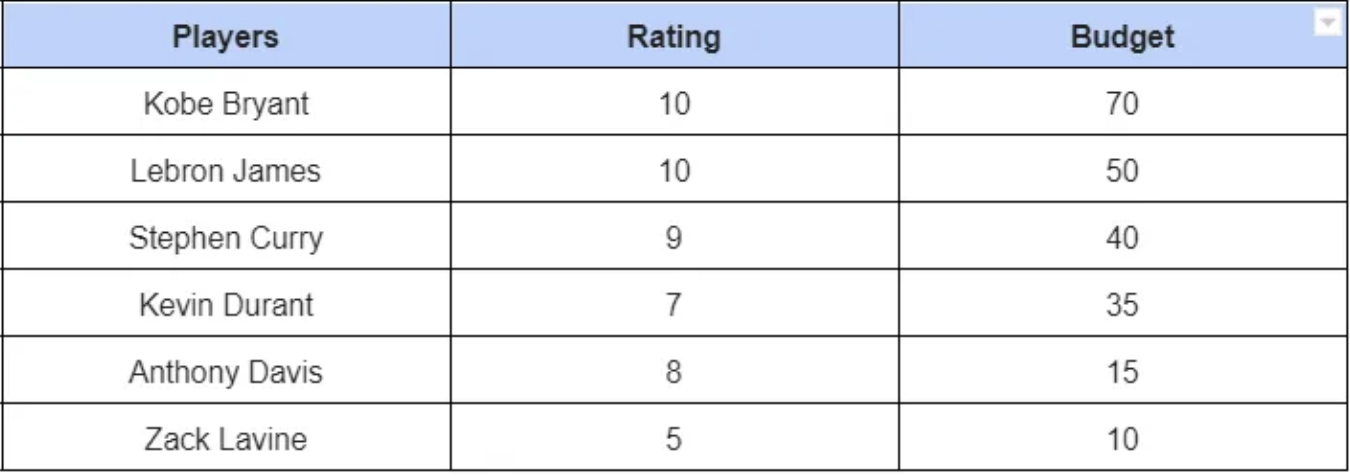

## What if I told you, you could simulate evolution?
Yes, you heard it right. The Genetic Algorithm does exactly that. GA uses natural selection to approximate solutions to a given problem. It is part of the Family of Evolutionary Algorithms. GA generates solutions to problems there are no solutions. It works on the underlying principles of Genetic Mutation.



## What is a Genetic Algorithm?
The genetic algorithm chooses members of the existing population to serve as parents and uses them to produce the offspring that will make up the following generation. The population “evolves” toward the best option over the course of subsequent generations.

There are 4 steps to the GA
1. Initiation
2. Fitness selection
3. Crossover
4. Mutation

This flow chart outlines the steps to the algorithm:
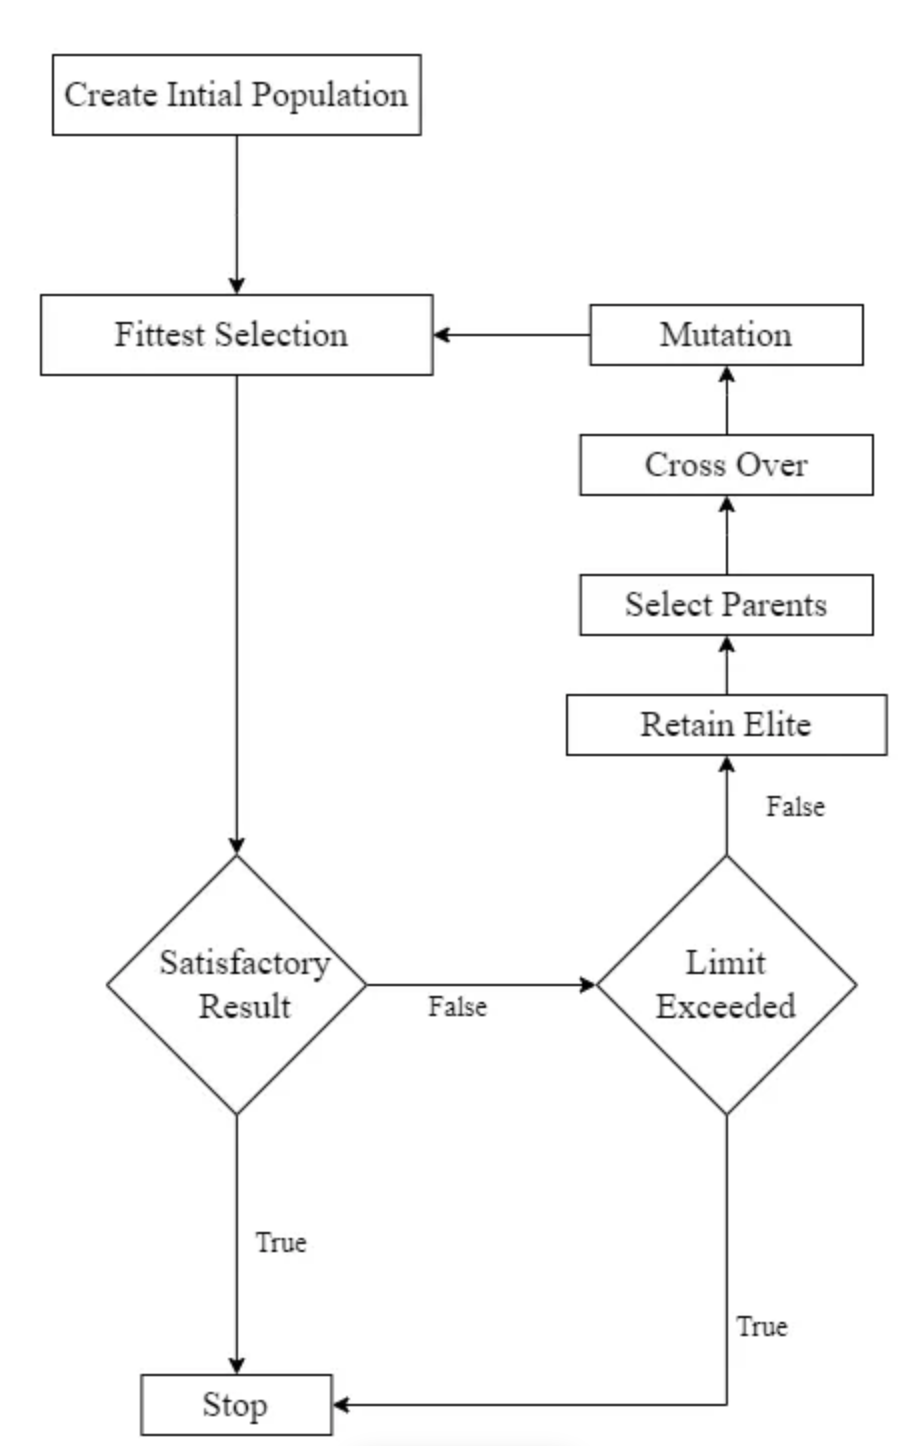



### Pesudocode

```
Algorithm: GA(n, χ, µ)<>
// Initialise generation 0:
k := 0;
Pk := a population of n randomly-generated individuals;
// Evaluate Pk:
Compute fitness(i) for each i ∈ Pk;
do
{ // Create generation k + 1:
// 1. Copy:
Select (1 − χ) × n members of Pk and insert into Pk+1;
// 2. Crossover:
Select χ × n members of Pk; pair them up; produce offspring; insert the offspring into Pk+1;
// 3. Mutate:
Select µ × n members of Pk+1; invert a randomly-selected bit in each;
// Evaluate Pk+1:
Compute fitness(i) for each i ∈ Pk;
// Increment:
k := k + 1;
}
while fitness of fittest individual in Pk is not high enough;
return the fittest individual from Pk;



n is the number of individuals in the population; χ is the fraction of the population to be replaced by crossover in
each iteration; and µ is the mutation rate.
 ```

## Implementation

In [ ]:
from random import choices, randint, randrange, random
from typing import List, Optional, Callable, Tuple
from collections import namedtuple
from functools import partial
import time

In [ ]:
Team = List[int]
Team_combinations = List[Team]
PopulateFunc = Callable[[], Team_combinations]
FitnessFunc = Callable[[Team], int]
SelectionFunc = Callable[[Team_combinations, FitnessFunc], Tuple[Team, Team]]
CrossoverFunc = Callable[[Team, Team], Tuple[Team, Team]]
MutationFunc = Callable[[Team], Team]
PrinterFunc = Callable[[Team_combinations, int, FitnessFunc], None]
Thing = namedtuple('Thing', ['name', 'value', 'weight'])
things = [
 Thing('Lebron James', 10, 50),
    Thing('Steph Curry  ', 9, 40),
    Thing('Kevin Durant', 7, 35),
    Thing('Anthony Davis', 8, 15),
    Thing('Zach LaVine', 5, 10),
    Thing('Kobe Bryant', 10, 70)

]

In [ ]:
# Team Generator: Generates teams with randomness from the given option of players

def generate_Team(length: int) -> Team:
    return choices([0, 1], k=length)

In [ ]:
# Team Combinations Generator: Creates a list of teams of a particular size, 
# in this case, the number of teams generated per population batch is 10.

def generate_team_combos(size: int, genome_length: int) -> Team_combinations:
    return [generate_Team(genome_length) for _ in range(size)]

### Cross-Over Function: Cross combines a pair of parent teams to generate a pair of off-springs, based on a cross-over point.

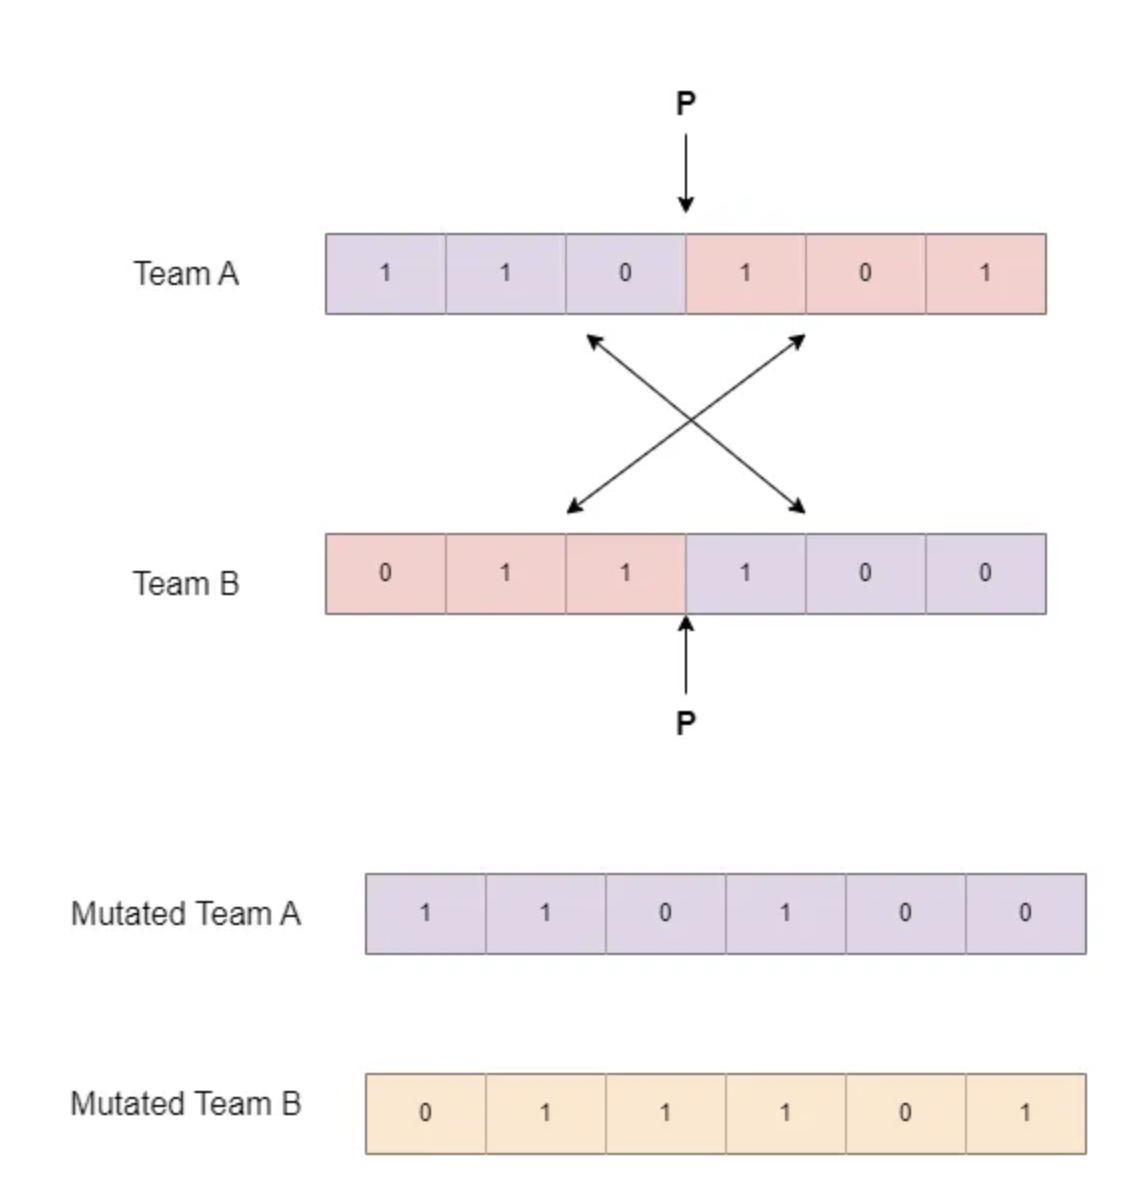

In [ ]:
def single_point_crossover(a: Team, b: Team) -> Tuple[Team, Team]:
    if len(a) != len(b):
        raise ValueError("Team a and b must be of same length")

    length = len(a)
    if length < 2:
        return a, b
    p = randint(1, length - 1)
    return a[0:p] + b[p:], b[0:p] + a[p:]

### Mutation Function: Inverts a single bit from 1->0 or 0->1 based on the probability value

Note: Players in the team list are represented by 1s and 0s. The inclusion of a particular player is indicated by 1 and 0 otherwise.

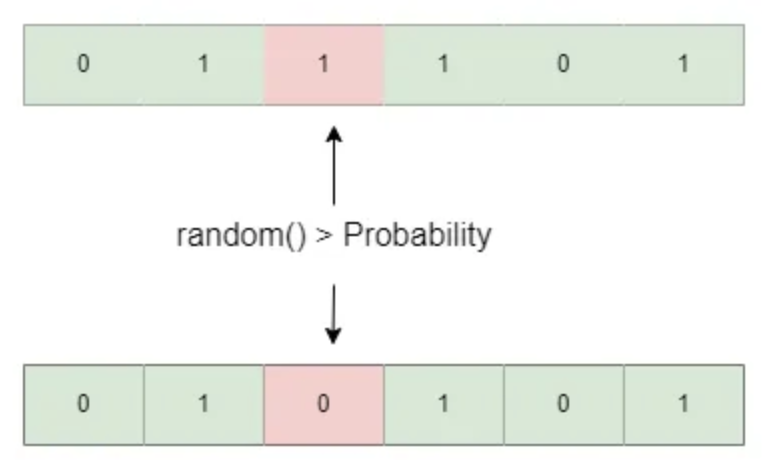

In [ ]:
def mutation(team: Team, num: int = 1, probability: float = 0.5) -> Team:
    print("before :",team)
    for _ in range(num):
        index = randrange(len(team))
        
        team[index] = team[index] if random() > probability else abs(team[index] - 1)
    print("After :",team)
    return team

In [ ]:
# Fitness Function: A function to check the overall team pricing and value is calculated and 
# the team is discarded if the value is above the weight limit ie. 105

def fitness(Team: Team, things: [Thing], weight_limit: int) -> int:
    if len(Team) != len(things):
        raise ValueError("genome and things must be of same length")

    weight = 0
    value = 0

    
    for i, thing in enumerate(things):
        if Team[i] == 1:
            weight += thing.weight
            value += thing.value


            if weight > weight_limit:
                return 0
    return value

In [ ]:
def selection_pair(population: Team_combinations, fitness_func: FitnessFunc) -> Team_combinations:
    return choices(
        population=population,
        weights=[fitness_func(gene) for gene in population],
        k=2
    )

In [ ]:
def sort_population(population: Team_combinations, fitness_func: FitnessFunc) -> Team_combinations:
    return sorted(population, key=fitness_func, reverse=True)
     

In [ ]:
def team_to_string(team: Team) -> str:
    return "".join(map(str, team))

Function (run_evolution): the master function that calls the rest of the function with a limit of 100 evolution and a Minimum rating of 29. if a team with a value below the fitness limit is found. the 2 fittest parents moved to the next generation rest of the fraction of the population is Mutated and crossed over to produce new offspring for the next generation. and the Cycle repeats till a winner is found or a limit is reached.

In [ ]:
def run_evolution(
        populate_func: PopulateFunc,
        fitness_func: FitnessFunc,
        fitness_limit: int,
        selection_func: SelectionFunc = selection_pair,
        crossover_func: CrossoverFunc = single_point_crossover,
        mutation_func: MutationFunc = mutation,
        generation_limit: int = 100,
        printer: Optional[PrinterFunc] = None) \
        -> Tuple[Team_combinations, int]:
    population = populate_func()

    for i in range(generation_limit):
        population = sorted(population, key=lambda genome: fitness_func(genome), reverse=True)

        if printer is not None:
            printer(population, i, fitness_func)
            
        if fitness_func(population[0]) >= fitness_limit:
            break

        next_generation = population[0:2]

        for j in range(int(len(population) / 2) - 1):
            parents = selection_func(population, fitness_func)
            offspring_a, offspring_b = crossover_func(parents[0], parents[1])
            offspring_a = mutation_func(offspring_a)
            offspring_b = mutation_func(offspring_b)
            next_generation += [offspring_a, offspring_b]

        population = next_generation

    return population, i

In [ ]:
def bruteforce(things, weight_limit: int):
    if len(things) == 0:
        return 0, []

    max_value = 0
    max_valued_packed = []
    for i, thing in enumerate(things):
        if thing.weight > weight_limit:
            continue

        value, packed = bruteforce(things[i + 1:], weight_limit - thing.weight)
        if value + thing.value >= max_value:
            max_value = value + thing.value
            max_valued_packed = [thing] + packed
    
    return max_value, max_valued_packed

In [ ]:
weight_limit = 105
start = time.time()
bruteforce(things, weight_limit)
end = time.time()
print("brute force algorithm execution time : ",end-start)
max_value, max_valued_packed= bruteforce(things, weight_limit)
print("Maximum Rating for the team:",max_value)
print("the dream team by Brute force:",max_valued_packed)

brute force algorithm execution time :  0.00015115737915039062
Maximum Rating for the team: 29
the dream team by Brute force: [Thing(name='Steph Curry  ', value=9, weight=40), Thing(name='Kevin Durant', value=7, weight=35), Thing(name='Anthony Davis', value=8, weight=15), Thing(name='Zach LaVine', value=5, weight=10)]


In [ ]:
start = time.time()
population, generations = run_evolution(
        populate_func=partial(generate_team_combos, size=10, genome_length=len(things)),
        fitness_func=partial(fitness, things=things, weight_limit=105),
        fitness_limit=29,
        generation_limit=200
    )
end = time.time()

print("Genetic algorithm execution time : ",end-start)

before : [1, 0, 0, 0, 1, 0]
After : [0, 0, 0, 0, 1, 0]
before : [0, 1, 0, 1, 1, 0]
After : [0, 1, 0, 1, 1, 0]
before : [1, 0, 1, 0, 0, 0]
After : [1, 0, 1, 0, 0, 1]
before : [1, 0, 0, 1, 1, 0]
After : [1, 0, 0, 1, 1, 1]
before : [0, 0, 1, 0, 1, 0]
After : [0, 0, 1, 0, 1, 0]
before : [0, 1, 0, 0, 1, 0]
After : [0, 1, 0, 1, 1, 0]
before : [1, 0, 0, 1, 1, 0]
After : [1, 0, 0, 1, 1, 0]
before : [1, 0, 0, 1, 1, 0]
After : [1, 1, 0, 1, 1, 0]
before : [1, 0, 0, 1, 1, 0]
After : [1, 0, 0, 0, 1, 0]
before : [1, 0, 1, 0, 0, 0]
After : [1, 0, 1, 0, 0, 0]
before : [0, 0, 1, 0, 1, 0]
After : [0, 0, 1, 0, 1, 1]
before : [0, 0, 0, 0, 1, 0]
After : [0, 0, 0, 0, 1, 0]
before : [0, 0, 1, 1, 1, 0]
After : [0, 0, 1, 1, 1, 0]
before : [0, 1, 0, 0, 1, 0]
After : [0, 1, 0, 0, 1, 0]
before : [0, 1, 0, 1, 1, 0]
After : [0, 1, 0, 1, 1, 0]
before : [0, 1, 0, 1, 1, 0]
After : [0, 0, 0, 1, 1, 0]
before : [0, 0, 1, 1, 0, 0]
After : [0, 1, 1, 1, 0, 0]
before : [1, 0, 1, 0, 1, 0]
After : [1, 0, 1, 0, 1, 0]
before : [

In [ ]:
print(generations,team_to_string(population[0]))

6 011110


## Results
1. The resultant team consists of Steph Curry, Kevin Durant, Anthony Davis, and Zach LaVine with an Overall pick rating of 29.

2. The Genetic algorithm outperforms the brute-force approach by executing faster.

## Conclusion
The algorithm is not deterministic, it does not give the same result every time we run the algorithm. But with more generated solutions per generation, we will ultimately reach a result that is “close enough” if not the “best solution”

#### Larger Selection
With lager values to select from, the brute force take exorbitant amount of time as sited by - Svogor, Ivan & Crnkovic, Ivica & Vrcek, Neven. (2013). Multi-criteria software component allocation on a heterogeneous platform. Proceedings of the International Conference on Information Technology Interfaces, ITI. 341-346. 10.2498/iti.2013.0558.- https://www.researchgate.net/publication/261306247_Multi-criteria_software_component_allocation_on_a_heterogeneous_platform

## Local Maximina Problem
As the Genetic algorithm explores various generations to find the best-fit solution/ Close to the best-fit solution and does not stop at its first over-the-fitness limit value it does not face the local maxima problem.

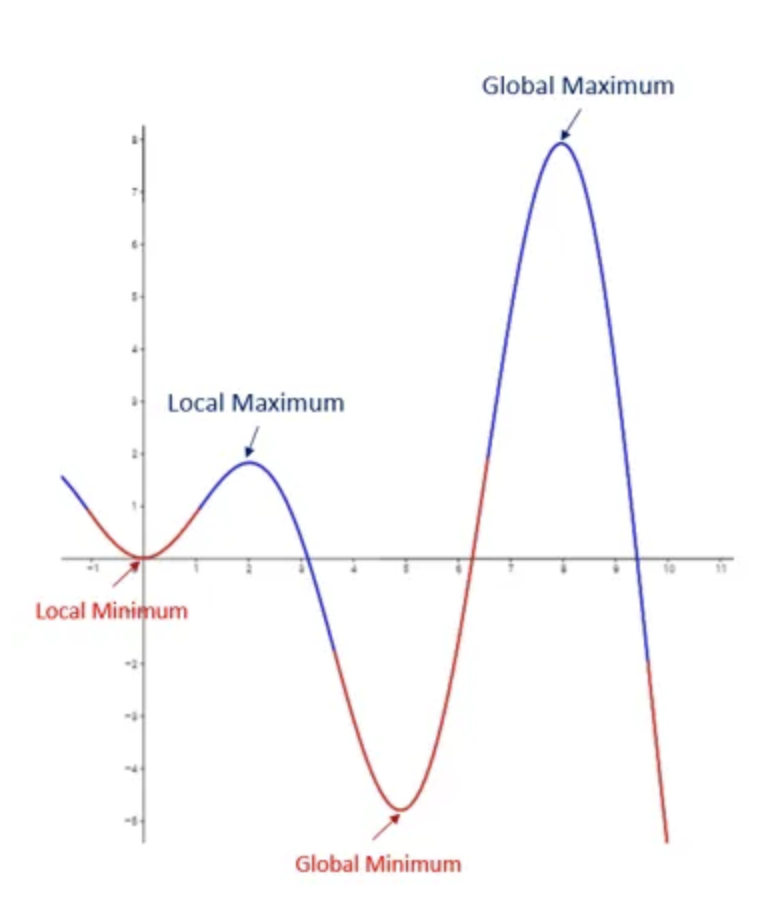

## References
1. Code references — https://github.com/kiecodes/genetic-algorithms
2. Basics of Genetic Algorithm by MatLab — https://www.mathworks.com/help/gads/what-is-the-genetic-algorithm.html

## License  

All code in this notebook is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license.  https://creativecommons.org/licenses/by/3.0/us/

These licenses let people distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright 2023 AI Skunks  https://github.com/aiskunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.